## Install and import necessary requirements

In [ ]:
!pip install -r requirements.txt

In [1]:
from Task2.CM.cm_inference import load_cm_model
from Task2.NER.data import process_sentence
from Task2.NER.ner_inference import load_ner_model
from PIL import Image

/Users/vika/PycharmProjects/Test/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package wordnet to /Users/vika/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/vika/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## Pipeline example

Before running pipeline models for NER and Classification tasks must be trained and saved

If training is performed by methods from this repository, saved models will be available in models folder

If no such folder exists - it can be downloaded from drive in README or creating by training models

In [2]:
# Task2/models folder exists and has 2 trained models saved in it
ner_model = 'models/ner_model'
cm_model = 'models/cm_model'

In [3]:
ner_model_pipe = load_ner_model('distilbert-base-uncased', ner_model)
cm_model_pipe = load_cm_model('google/vit-base-patch16-224', cm_model)

Device set to use mps:0
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use mps:0


Define path to the image and the text for the input

In [4]:
path_to_image = 'sample_input_images/cow.jpeg'
text = 'I think it is a cow'

I think it is a cow


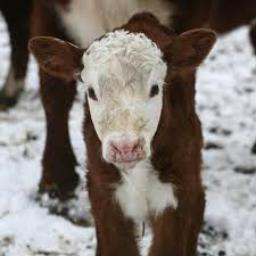

In [5]:
#show data for better understanding
cow_image = Image.open(path_to_image)
print(text)
cow_image

In [8]:
def run_demo(p, t):
    cm_label = cm_model_pipe(p)[0]['label']
    text = process_sentence(t)
    results = ner_model_pipe(text)
    for result in results:
        if len(result) != 0:
            ner_label = result[0]['word']
            break
    return cm_label.lower() == ner_label.lower()

state = run_demo(path_to_image, text)
print(f'Statement is {state}')

Statement is True


### Several other examples

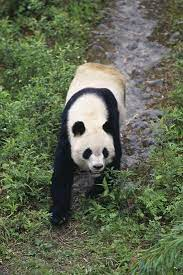

In [15]:
path_to_image = 'sample_input_images/panda.jpeg'
panda_image = Image.open(path_to_image)
panda_image

In [16]:
text = 'I see a cat here'
state = run_demo(path_to_image, text)
print(f'Statement is {state}')

Statement is False


In [17]:
text = 'This is a panda'

state = run_demo(path_to_image, text)
print(f'Statement is {state}')

Statement is True


## Run with command-line

In [1]:
!python main.py --im sample_input_images/panda.jpeg --txt 'This is a cow'

[nltk_data] Downloading package wordnet to /Users/vika/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/vika/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
Device set to use mps:0
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use mps:0
Statement is False
